# Worksheet 12

Name:  
UID: 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1 is
2 is not. 
3 Yes it is. 
4 no 

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

i would split my dataset into a training dataset to build the models and a testing sataset to test my model so that i can test the model with data it has not seen before.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

in general underfitting refers to a model that is too simple and does not have good prediction power on the training data or the testing sataset. low prediction on training set and and overly simple model are two lookout signs of undefitting. 

Overfitting is the opoosite. it is a model with high predicting power on the training dataset, but not so good on actual dataset. it is a very complex model. some things that can lead to overfitting is not dealing with outliers or noise and trying to explain these, as well as a complex model and high predicting power on the training dataset but not on new data. 

### K Nearest Neighbors

In [79]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

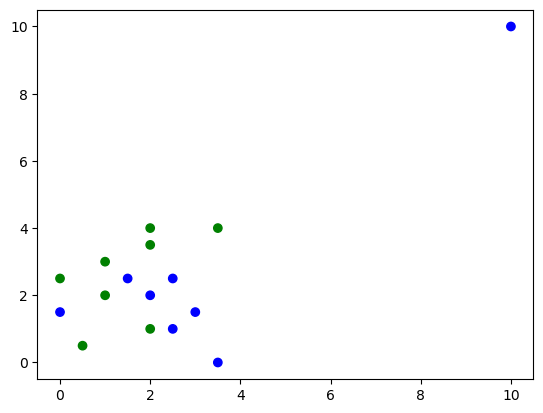

In [80]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

yep. the point with coordinates 10,10 stands out as an outlier 

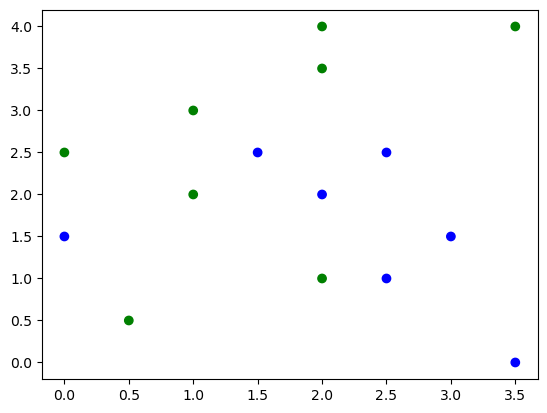

In [81]:
filtered_data = {
    key: [val for i, val in enumerate(data[key]) if (data["Attribute A"][i], data["Attribute B"][i]) < (7, 7)]
    for key in data
}

data = filtered_data

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()



Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The dataset seems to have a weak positive correlation, so the higher class A goes, the higher I expect class B to go. in this sense the point with cordinates (3.5,0) could be noise since it has the highest value in the A axis but the lowest on the B axis which goes against the trend.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

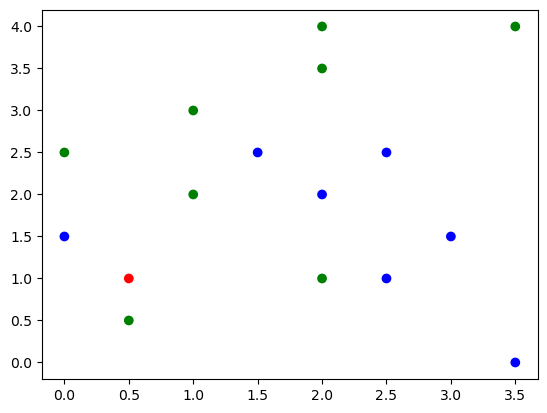

In [82]:
data["Attribute A"].append(0.5)
data["Attribute B"].append(1)
data["Class"].append(2)

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()




e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[(0.5, 0.5, 1), (0.0, 1.5, 0), (1.0, 2.0, 1)]


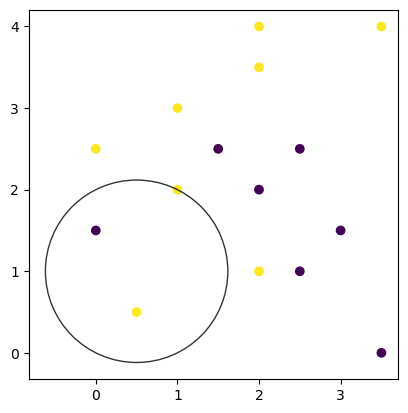

In [83]:
#for key in data.keys():
 #   data[key].pop()


def n_closest_to(example, n, point):

    # n = numbers of points 
    # example = dataset
    # point = point we are looking for 

    attributes_a = np.array(data["Attribute A"])
    attributes_b = np.array(data["Attribute B"])
    class_c = np.array(data["Class"])

    point_arr = np.array(point)
    
    differences = np.vstack((attributes_a, attributes_b)).T - point_arr
    distances = np.linalg.norm(differences, axis=1)
    closest_indices = np.argsort(distances)[:n]
    
    closest_points = [(attributes_a[i], attributes_b[i], class_c[i]) for i in closest_indices]
    
    return closest_points


location = ( 0.5 , 1 )
closest_pts = n_closest_to(data,3,location)
print(closest_pts)
further_pt = np.array(closest_pts[2][:2])
radius = np.linalg.norm(further_pt - np.array(location))
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], c=data["Class"])
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [93]:



def majority(points):

    one_counter = 0 
    two_counter = 0

    

    for point in points:

        if point[2] == 1:
            one_counter += 1
        
        else:
            two_counter +=1
    
    if one_counter > two_counter:
        return 1
    
    else:
        return 2
    
    






g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [95]:
count = 0
total_points = len(data["Attribute A"])

for i in range(total_points):
    
    actual_class = data["Class"][i]
    training_set = {
        "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i+1:],
        "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i+1:],
        "Class": data["Class"][:i] + data["Class"][i+1:]
    }
    prediction = majority(n_closest_to(training_set,3,(data["Attribute A"][i], data["Attribute B"][i])))

    if prediction == actual_class:
        count += 1



accuracy = count/total_points

print("overall accuracy = ", accuracy)

overall accuracy =  0.4666666666666667


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


c:\Users\Car_1\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

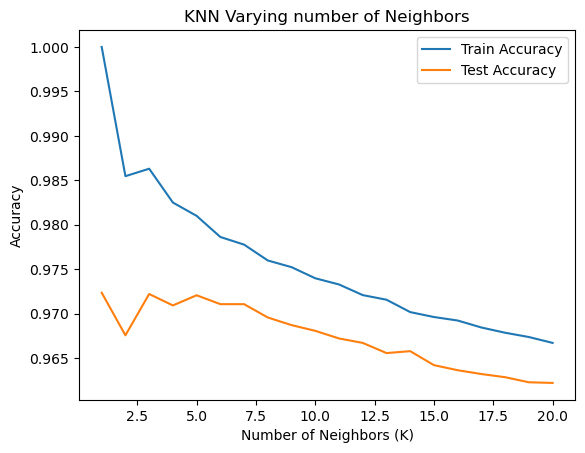

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []

for K in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
   
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))


plt.plot(range(1, 21), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of Neighbors')
plt.legend()
plt.show()











Looking at the graph. i would keep the number of neighbors, k,  at 3 since that is when we have a high test accuracy and the training accuracy is little bit lower which is good to avoid overfitting. 5 is also a good choice to avoid overfitting.  but i based my decision on test accuracy as the top priority. 

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

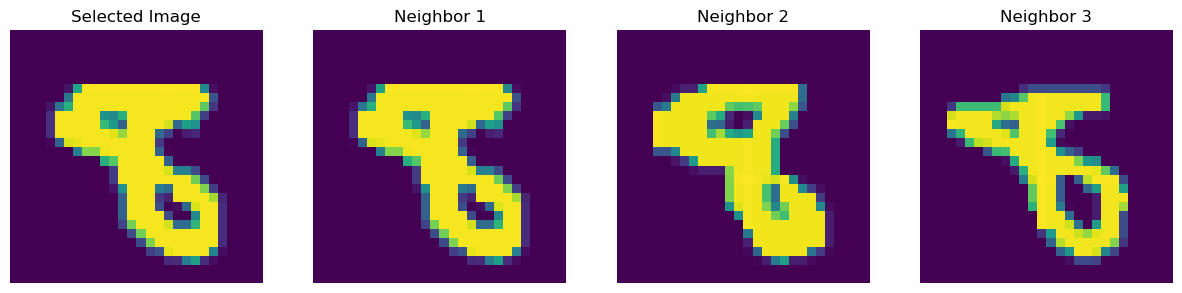

In [113]:
from sklearn.neighbors import NearestNeighbors



def plot_k_nearest_neighbors(X_train, n_neighbors=3):
    
    random_index = np.random.randint(0, len(X_train))
    image = X_train[random_index].reshape(28, 28)
    
   
    neighbors_model = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_model.fit(X_train)
    
    
    distances, indices = neighbors_model.kneighbors([X_train[random_index]])
    
    
    plt.figure(figsize=(15, 10))
    
    
    plt.subplot(1, n_neighbors + 1, 1)
    plt.imshow(image)
    plt.title("Selected Image")
    plt.axis('off')
    
    
    for i in range(n_neighbors):
        neighbor_index = indices[0][i]
        neighbor_image = X_train[neighbor_index].reshape(28, 28)
        
        plt.subplot(1, n_neighbors + 1, i + 2)
        plt.imshow(neighbor_image)
        plt.title(f"Neighbor {i+1}")
        plt.axis('off')
    
    plt.show()

plot_k_nearest_neighbors(X_train, 3)


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [114]:
from sklearn.pipeline import make_pipeline

dimensionality_reduction = 


knn_model = KNeighborsClassifier(n_neighbors=3)





model = make_pipeline(dimensionality_reduction, knn_model)


model.fit(X_train, y_train)

NameError: name 'dimensionality_reduction' is not defined

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [129]:
import pandas as pd;
from sklearn.preprocessing import LabelEncoder;


titanic_train = pd.read_csv(r"C:\Users\Car_1\OneDrive\Desktop\CS_Classes\cs506\Data-Science-Fundamentals\lecture_12\titanic\train.csv");
titanic_test = pd.read_csv(r"C:\Users\Car_1\OneDrive\Desktop\CS_Classes\cs506\Data-Science-Fundamentals\lecture_12\titanic\test.csv")



# adding new features and making sure they 
titanic_train['Title'] = titanic_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # person title
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1                 #person family size
titanic_train['Title'] = LabelEncoder().fit_transform(titanic_train['Title'])



titanic_train.head()

# Using KNN for survival based on new features. 

features = ['Title', 'FamilySize']

X_train, X_val, y_train, y_val = train_test_split(titanic_train[features], titanic_train["Survived"], test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
predictions = knn.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, predictions)}')


titanic_test['Title'] = titanic_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # person title
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1                 #person family size
titanic_test['Title'] = LabelEncoder().fit_transform(titanic_test['Title'])

test_predictions = knn.predict(titanic_test[features])

submission = pd.DataFrame({
    'PassengerId': titanic_test['PassengerId'], 
    'Survived': test_predictions
})

submission.to_csv('titanic_knn_predictions.csv', index=False)












Validation Accuracy: 0.7430167597765364


Reasoning for new features: 

 based on the little parts ive seen in the movie. im thinking knowing if someone was married and if they had family on board increased their chance of survival. i think that it makes sense that someone married and with family on board is more likely to have that dawg in them and find a way to try and survive since they likely have priority for the boats. On the other hand, someone with family on board can be slowed down and might have died trying to save their loved ones. 

 For the number of neighbors i chose 4 since that is the usual number of family members. So im assuming families will be grouped together. 

Kaggle Username used for submission : CarlosContreras123
Score : 0.7 Fair enough for me 

link to user since i cant find the one to my submission: https://www.kaggle.com/carloscontreras123
